## Imports

In [85]:
import pandas as pd
import numpy as np

## Data preprocessing

In [86]:
df = pd.read_csv('knn_exam_results.csv', sep=',',header=None)
df

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [87]:
D = df.values
X_train, Y_train = D[60:90,0:2], D[60:90,2:]
X_test, Y_test = D[90:100,0:2], D[90:100,2:]

## KNN Classification

In [88]:
class KNNClassifier:
  k = None
  X = None
  Y = None
  def __init__(self, X, Y, k):
    self.k = k
    self.X = X
    self.Y = Y

  def getDistance(self, x1, x2):
    return np.sqrt(np.square(x1 - x2).sum())
  
  def predict(self, X_test):
    n = len(self.X)
    heap = []
    for i in range(n):
      heap.append([self.getDistance(X_test, self.X[i]), int(self.Y[i]) ])
    
    heap.sort()
    freq = {}
    freq[0] = freq[1] = 0
    for i in range(self.k):
      freq[heap[i][1]] += 1
    
    return max(freq, key=freq.get)

  def getAccuracy(self, X_test, Y_test):
    n = len(X_test)
    freq = 0
    for i in range(n):
      if self.predict(X_test[i]) == Y_test[i]:
        freq += 1

    return freq * 100 / n

### KNN Classifier for K = 3

In [89]:
knn_model = KNNClassifier(X_train, Y_train, 3)
acc = knn_model.getAccuracy(X_test, Y_test)

print('Examples:')
print(f'(i)  Input : {X_test[7]}, Output : {int(Y_test[7])}, Predicted Output: {knn_model.predict(X_test[7])} ')
print(f'(ii) Input : {X_test[2]}, Output : {int(Y_test[2])}, Predicted Output: {knn_model.predict(X_test[2])} ')
print()
print(f'Accuracy of KNN classifier model is {round(acc, 2)}%')

Examples:
(i)  Input : [99.31500881 68.77540947], Output : 1, Predicted Output: 1 
(ii) Input : [55.48216114 35.57070347], Output : 0, Predicted Output: 0 

Accuracy of KNN classifier model is 80.0%


### KNN Classifier for K = 5

In [90]:
knn_model = KNNClassifier(X_train, Y_train, 5)
acc = knn_model.getAccuracy(X_test, Y_test)

print('Examples:')
print(f'(i)  Input : {X_test[7]}, Output : {int(Y_test[7])}, Predicted Output: {knn_model.predict(X_test[7])} ')
print(f'(ii) Input : {X_test[2]}, Output : {int(Y_test[2])}, Predicted Output: {knn_model.predict(X_test[2])} ')
print()
print(f'Accuracy of KNN classifier model is {round(acc, 2)}%')

Examples:
(i)  Input : [99.31500881 68.77540947], Output : 1, Predicted Output: 1 
(ii) Input : [55.48216114 35.57070347], Output : 0, Predicted Output: 0 

Accuracy of KNN classifier model is 100.0%


## KNN Regression

In [91]:
class KNNRegressor:
  k = None
  X = None
  Y = None
  def __init__(self, X, Y, k):
    self.k = k
    self.X = X
    self.Y = Y

  def getDistance(self, x1, x2):
    return np.sqrt(np.square(x1 - x2).sum())
  
  def predict(self, X_test):
    n = len(self.X)
    heap = []
    for i in range(n):
      heap.append([self.getDistance(X_test, self.X[i]), int(self.Y[i]) ])
    
    heap.sort()
    freq = {}
    freq[0] = freq[1] = 0
    for i in range(self.k):
      freq[heap[i][1]] += 1
    
    return freq[1]/self.k

  def getAccuracy(self, X_test, Y_test):
    n = len(X_test)
    freq = 0
    for i in range(n):
      if abs(self.predict(X_test[i]) - Y_test[i]) < 0.5:
        freq += 1

    return freq * 100 / n

### KNN Regression for K = 3

In [92]:
knn_model = KNNRegressor(X_train, Y_train, 3)
acc = knn_model.getAccuracy(X_test, Y_test)

print('Examples:')
for i in range(10):
  print(f'Input : {X_test[i]}, Output : {int(Y_test[i])}, Predicted Output: { round(knn_model.predict(X_test[i]), 2) } ')
print()  
print(f'Accuracy of KNN Regression model is {round(acc, 2)}%')

Examples:
Input : [94.09433113 77.15910509], Output : 1, Predicted Output: 1.0 
Input : [90.44855097 87.50879176], Output : 1, Predicted Output: 1.0 
Input : [55.48216114 35.57070347], Output : 0, Predicted Output: 0.0 
Input : [74.49269242 84.84513685], Output : 1, Predicted Output: 1.0 
Input : [89.84580671 45.35828361], Output : 1, Predicted Output: 0.33 
Input : [83.48916274 48.3802858 ], Output : 1, Predicted Output: 0.33 
Input : [42.26170081 87.10385094], Output : 1, Predicted Output: 0.67 
Input : [99.31500881 68.77540947], Output : 1, Predicted Output: 1.0 
Input : [55.34001756 64.93193801], Output : 1, Predicted Output: 0.67 
Input : [74.775893  89.5298129], Output : 1, Predicted Output: 1.0 

Accuracy of KNN Regression model is 80.0%


### KNN Regression for K = 5

In [93]:
knn_model = KNNRegressor(X_train, Y_train, 5)
acc = knn_model.getAccuracy(X_test, Y_test)

print('Examples:')
for i in range(10):
  print(f'Input : {X_test[i]}, Output : {int(Y_test[i])}, Predicted Output: { round(knn_model.predict(X_test[i]),2) } ')
print()  
print(f'Accuracy of KNN Regression model is {round(acc, 2)}%')

Examples:
Input : [94.09433113 77.15910509], Output : 1, Predicted Output: 1.0 
Input : [90.44855097 87.50879176], Output : 1, Predicted Output: 1.0 
Input : [55.48216114 35.57070347], Output : 0, Predicted Output: 0.0 
Input : [74.49269242 84.84513685], Output : 1, Predicted Output: 1.0 
Input : [89.84580671 45.35828361], Output : 1, Predicted Output: 0.6 
Input : [83.48916274 48.3802858 ], Output : 1, Predicted Output: 0.6 
Input : [42.26170081 87.10385094], Output : 1, Predicted Output: 0.8 
Input : [99.31500881 68.77540947], Output : 1, Predicted Output: 1.0 
Input : [55.34001756 64.93193801], Output : 1, Predicted Output: 0.6 
Input : [74.775893  89.5298129], Output : 1, Predicted Output: 1.0 

Accuracy of KNN Regression model is 100.0%


## K vs accuracy plot

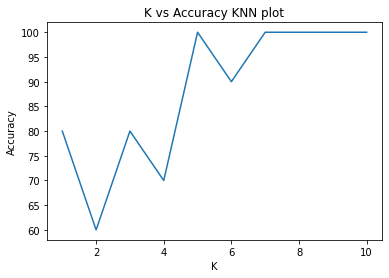

In [94]:
y = []
for k in range(1,11):
  knn_model = KNNRegressor(X_train, Y_train, k)
  acc = knn_model.getAccuracy(X_test, Y_test) 
  y.append(acc)

import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x, y)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy KNN plot')
plt.show()
